# Chicago public schools : Student Clustering

## Topic


In this notebook, I'll be doing a study about the data of students from a public Chicago school. This dataset shows all school level performance data used to create CPS School Report Cards for the 2011-2012 school year. It contains different information about the students such as:

- Contact information (adress, city, state, zip code, phone number, link...)
- Ids like school id
- Evaluations of the students' soft skills ( discipline, leardship , safety...)
- Evaluations of the parental milieu (parents' engagement/environment/involvement scores )
- Evaluations of the teachers ( teacher score, teacher icon)
- ISAT scores. ISAT (The Idaho Standards Achievement Test scores) assesses a candidate's intellectual skills and abilities that are the foundation of academic success at tertiary level.
- PK (pre kinderkarten) evaluations.
- Track schedule information which is a system whereby students are separated into different groups or classes according to test scores or relative scholastic ability, as to assure that gifted students are not inhibited by slower learners.



## Objectives
- Treat the data
- Undersand the data and its important caracteristics
- Use different model to cluster the students of this school based on the data available.

## Summary
- Importing libraries
- Importing the dataset
- Feature engineering
- Exploratory data analysis:
  - Boxplots
  - Histplots
  - Students Dataviz
  - Parents Dataviz
  - Teachers Dataviz
  - Correlations
- Splitting and preparing data for ML
- Kmeans : 
  - Silhouette plot
  - Elbow plot
  - Making predictions 
  - Evaluation matrices (Silhouette score, CH index, DB index)
  - Visualizing clusters
  - Evaluating the stability of clusters
- DBSCAN : 
  - Minimun Points
  - Epsilon
  - Making predictions 
  - Evaluation matrices (Silhouette score, CH index, DB index)
  - Visualizing clusters
  - Evaluating the stability of clusters
- Gaussian mixture : 
  - Making predictions 
  - Evaluation matrices (Silhouette score, CH index, DB index)
  - Visualizing clusters
  - Evaluating the stability of clusters
- Agglomerative hierarchical clustering : 
  - Dendrogram
  - Making predictions 
  - Evaluation matrices (Silhouette score, CH index, DB index)
  - Visualizing clusters
  - Evaluating the stability of clusters
- Comparing algorithms' performances
- Conclusion
- References


## Importing libraries

In [390]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
sns.set(rc = {'figure.figsize':(15,8)})

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

## Uploading the dataset

In [391]:
cards = pd.read_csv(r'C:\Users\imane\OneDrive\Desktop\Chicago_Public_schools\Chicago-RP-2011-2012-1.csv', sep =",")
cards.head()

,School ID,Name of School,"Elementary, Middle, or High School",Street Address,City,State,ZIP Code,Phone Number,Link,Network Manager,...,RCDTS Code,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,Community Area Number,Community Area Name,Ward,Police District,Location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,150000000000000,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,...,150000000000000,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,...,150000000000000,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressRep...,Pershing Elementary Network,...,150000000000000,1164504.290,1873959.199,41.809757,-87.672145,61,NEW CITY,20,9,"(41.8097569, -87.6721446)"
4,610513,Air Force Academy High School,HS,3630 S Wells St,Chicago,IL,60609,(773) 535-1590,http://schoolreports.cps.edu/SchoolProgressRep...,Southwest Side High School Network,...,150000000000000,1175177.622,1880745.126,41.828146,-87.632794,34,ARMOUR SQUARE,11,9,"(41.82814609, -87.63279369)"


In [392]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 79 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   School ID                                          566 non-null    int64  
 1   Name of School                                     566 non-null    object 
 2   Elementary, Middle, or High School                 566 non-null    object 
 3   Street Address                                     566 non-null    object 
 4   City                                               566 non-null    object 
 5   State                                              566 non-null    object 
 6   ZIP Code                                           566 non-null    int64  
 7   Phone Number                                       566 non-null    object 
 8   Link                                               565 non-null    object 
 9   Network Ma

The dataset contains 79 columns and 566 rows. We notice that most of its columns are objects, but in fact thos are numerical values taken by python to be objects because they either contain "no data" when no data is availabe, or "nda" when the student didn't wish to share their info, or percentages as well.

### Checking missing values

<AxesSubplot:>

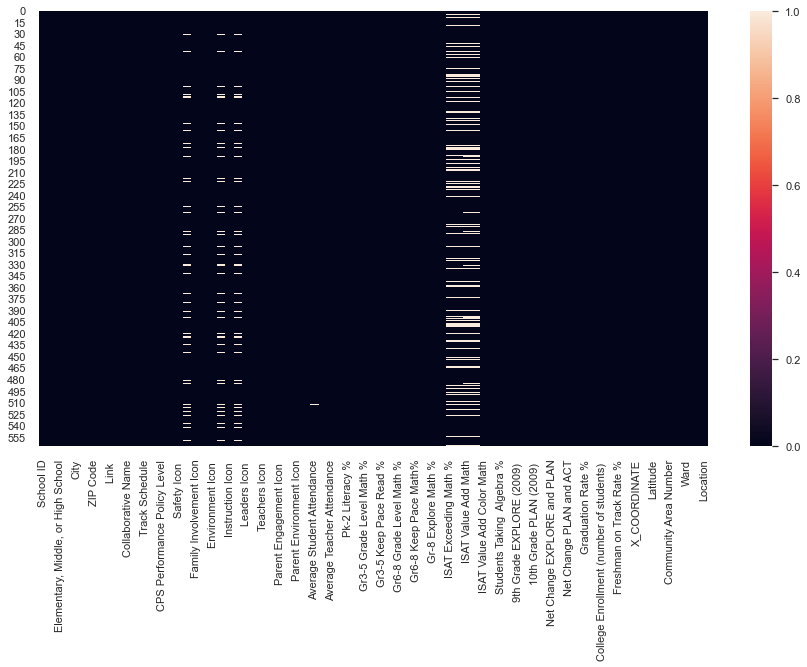

In [393]:
sns.heatmap(cards.isnull())

In [394]:
def table (df):
    missing = df.isnull().sum()
    missing_perc = df.isnull().sum() * 100/ len(df)
    missing_df = pd.concat([missing,missing_perc], axis = 1)
    missing_df = missing_df.rename(columns={0:"n missing",1:"n percentage"})
    return missing_df

In [395]:
missing = table(cards)
missing = missing.round(1)
missing.drop(missing.index[(missing["n percentage"] == 0.0)],axis = 0 , inplace = True)
missing = missing.sort_values(by = ["n percentage"],ascending = False)
missing = missing.reset_index()
missing

,index,n missing,n percentage
0,ISAT Value Add Math,98,17.3
1,ISAT Value Add Read,98,17.3
2,ISAT Exceeding Math %,90,15.9
3,ISAT Exceeding Reading %,90,15.9
4,Safety Score,53,9.4
5,Environment Score,53,9.4
6,Instruction Score,53,9.4
7,Link,1,0.2
8,Average Student Attendance,1,0.2


Here I tried to see the number and percentage of missing values. Apparently therer aren't a lot.

### Checking unique categories

In [396]:
objects = cards.select_dtypes("object")
objects.describe().transpose()

,count,unique,top,freq
Name of School,566,566,Abraham Lincoln Elementary School,1
"Elementary, Middle, or High School",566,3,ES,462
Street Address,566,550,3120 S Kostner Ave,4
City,566,1,Chicago,566
State,566,1,IL,566
Phone Number,566,564,(773) 534-1530,2
Link,565,565,http://schoolreports.cps.edu/SchoolProgressRep...,1
Network Manager,566,20,Fullerton Elementary Network,41
Collaborative Name,566,5,NORTH-NORTHWEST SIDE COLLABORATIVE,149
Adequate Yearly Progress Made?,566,3,No,476


In [397]:
cards.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
School ID,566.0,6.096818e+05,8831.060946,4.000180e+05,6.098732e+05,6.100525e+05,6.102128e+05,6.105440e+05
ZIP Code,566.0,6.062973e+04,20.248024,6.060500e+04,6.061800e+04,6.062500e+04,6.063900e+04,6.082700e+04
Safety Score,513.0,4.950487e+01,20.110837,1.000000e+00,3.500000e+01,4.800000e+01,6.100000e+01,9.900000e+01
Environment Score,513.0,4.776608e+01,16.215584,1.000000e+00,3.700000e+01,4.700000e+01,5.800000e+01,9.900000e+01
Instruction Score,513.0,4.828850e+01,17.417176,1.000000e+00,3.700000e+01,4.700000e+01,5.900000e+01,9.900000e+01
Rate of Misconducts (per 100 students),566.0,2.108587e+01,27.543835,0.000000e+00,4.525000e+00,1.225000e+01,2.697500e+01,2.516000e+02
ISAT Exceeding Math %,476.0,2.035630e+01,16.850870,0.000000e+00,9.175000e+00,1.600000e+01,2.490000e+01,1.000000e+02
ISAT Exceeding Reading %,476.0,1.566702e+01,15.208361,0.000000e+00,6.100000e+00,1.095000e+01,1.952500e+01,1.000000e+02
ISAT Value Add Math,468.0,6.858974e-02,1.041174,-3.500000e+00,-6.000000e-01,0.000000e+00,7.000000e-01,3.600000e+00
ISAT Value Add Read,468.0,2.264957e-02,1.042543,-5.000000e+00,-6.000000e-01,0.000000e+00,6.250000e-01,4.900000e+00


Here I tried to dig a little deeper into the data, we got the unique values of categorical columns (which will help us decide which columns to keep), and the percentiles of numerical features.

## Feature engineering

### Deleting unnecessary columns

In [398]:
cards.drop(cards.columns[[1,8,16,20,22,24,26,28,0,3,4,5,6,7,9,18,30,75,69,70,71,72,73,74,76,77,78,10,
                          52,53,56,58,59,61,67,78,57]], axis=1, inplace=True)


In this part, I deleted some columns that I though were not necessary like the following:
- Name of school, because this column has 566 unique categories, meaning that all students went to different schools and keeping this detail doesn't help the clustering in any way.
- Personal information like link, phone number and adress are not important either.
- State and city because they are the same for all students (Chicago Illinois)
- Network manager betcause it has 20 unique values which is many
- Icons of all kinds (ex: safety icon...) because right next to icon columns there are columns representing those icons quantitavely, so I eliminated the redundancy.
- Geolocation data and area name number and zip codes.

In [399]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 43 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Elementary, Middle, or High School                 566 non-null    object 
 1   Adequate Yearly Progress Made?                     566 non-null    object 
 2   Track Schedule                                     566 non-null    object 
 3   CPS Performance Policy Status                      566 non-null    object 
 4   CPS Performance Policy Level                       566 non-null    object 
 5   Healthy Schools Certified?                         566 non-null    object 
 6   Safety Score                                       513 non-null    float64
 7   Family Involvement Score                           566 non-null    object 
 8   Environment Score                                  513 non-null    float64
 9   Instructio

We now kept only 43 columns and we see that many of them are objects. Most of those columns are supposed to be percentages and numbers (ex: student taking Algebra %, Family involvement score...) but because the people who provided the dataset filled some unavailable data with "no data" and/or "NDA" (non disclosure agreement), they were taken as object columns by pandas.

### Transforming erroneous "Object" features to numerical features

#### Columns containing % sign

In [400]:
# Keeping the erroneous columns
erroneous = cards[["Average Student Attendance","Average Teacher Attendance",
                  "Individualized Education Program Compliance Rate ",]]

In [401]:
# Removing erroneous columns from the dataset
for col in erroneous:
    if col in cards:
        cards = cards.drop(col, axis = 1)

In [402]:
# Replacing NDA with numpy not a number
erroneous = erroneous.replace('NDA', np.nan)

In [403]:
# Replacing no data with np nan
erroneous = erroneous.replace('No data.', np.nan)

In [404]:
erroneous['Individualized Education Program Compliance Rate '] = erroneous["Individualized Education Program Compliance Rate "].str.rstrip('%').astype('float') / 100.0
erroneous['Average Student Attendance'] = erroneous['Average Student Attendance'].str.rstrip('%').astype('float') / 100.0
erroneous['Average Teacher Attendance'] = erroneous['Average Teacher Attendance'].str.rstrip('%').astype('float') / 100.0

In [405]:
# Transforming erroneous columns to floats
erroneous = erroneous.astype(float)

In [406]:
# Joining it to the dataset
cards = cards.join(erroneous)

In this part, I tried to transform the columns containing numbers that were taken as strings by pyhton (because they include "no data" or "nda" or percentages) into float columns. In order to do that, I first had to replace "no data" and "nda" with numpy not a number, then I got rid of the % sign and finally transformed the columns type to float. We see that the number of available data droped for some columns, I suppose because thos values were filled with "no data" or "nda".
Other than that we now have only 9 object columns that are valid.

#### Numerical columns containing "NDA"and "no data"

In [407]:
cards = cards.replace('NDA', np.nan)

In [408]:
cards = cards.replace('No data.', np.nan)

In [409]:
erroneous = cards[["Family Involvement Score","Leaders Score ","Teachers Score",
                  "Parent Engagement Score","Parent Environment Score","Pk-2 Literacy %","Pk-2 Math %",
                   "Gr3-5 Grade Level Math %","Gr3-5 Grade Level Read % ","Gr3-5 Keep Pace Read %","Gr3-5 Keep Pace Math %",
                   "Gr6-8 Grade Level Math %","Gr6-8 Grade Level Read %","Gr6-8 Keep Pace Math%","Gr6-8 Keep Pace Read %",
                   "Gr-8 Explore Math %","Gr-8 Explore Read %","Students Taking  Algebra %","Students Passing  Algebra %",
                   "Net Change EXPLORE and PLAN","Net Change PLAN and ACT","College Eligibility %","Graduation Rate %",
                   "College Enrollment Rate %","Freshman on Track Rate %"
                   
                  ]]

In [410]:
# Removing erroneous columns from the dataset
for col in erroneous:
    if col in cards:
        cards = cards.drop(col, axis = 1)

In [411]:
# Transforming erroneous columns to floats
erroneous = erroneous.astype(float)

In [412]:
# Joining it to the dataset
cards = cards.join(erroneous)

Then I replaced "NDA" and "no data" with numpy nan, transformed the erroneous object columns back into floats and rejoined it with the main dataset.

### Checking missing values after transformation

In [413]:
missing = table(cards)
missing = missing.round(1)
missing.drop(missing.index[(missing["n percentage"] == 0.0)],axis = 0 , inplace = True)
missing = missing.sort_values(by = ["n percentage"],ascending = False)
missing = missing.head(8)
missing

,n missing,n percentage
College Enrollment Rate %,489,86.4
Graduation Rate %,487,86.0
Net Change PLAN and ACT,484,85.5
College Eligibility %,480,84.8
Freshman on Track Rate %,479,84.6
Net Change EXPLORE and PLAN,479,84.6
Students Passing Algebra %,436,77.0
Students Taking Algebra %,408,72.1


In [414]:
for col in cards:
    if col in missing.index:
        cards = cards.drop(col, axis = 1)

In [415]:
cards.isnull().sum()

Elementary, Middle, or High School                     0
Adequate Yearly Progress Made?                        18
Track Schedule                                         0
CPS Performance Policy Status                          5
CPS Performance Policy Level                           5
Healthy Schools Certified?                             0
Safety Score                                          53
Environment Score                                     53
Instruction Score                                     53
Rate of Misconducts (per 100 students)                 0
ISAT Exceeding Math %                                 90
ISAT Exceeding Reading %                              90
ISAT Value Add Math                                   98
ISAT Value Add Read                                   98
College Enrollment (number of students)                0
Average Student Attendance                             1
Average Teacher Attendance                             0
Individualized Education Progra

After looking at the number of empty values and their percentages, I decided to delete columns with more than 60% missing values, so now we have 32 columns only.

### Imputing missing values

In [416]:
cards = cards.fillna(cards.mean())

C:\Users\imane\AppData\Local\Temp/ipykernel_12308/2579167429.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cards = cards.fillna(cards.mean())


In this part I just replaced the missing values with mean of the column

### Replacing "not enough data" in categorical columns

In [417]:
cards = cards.replace('Not Enough Data', np.nan)

In [418]:
level = ["CPS Performance Policy Level"]
cards[level]=cards[level].fillna(cards.mode().iloc[0])

In [419]:
level = ["CPS Performance Policy Status"]
cards[level]=cards[level].fillna(cards.mode().iloc[0])

In [420]:
level = ["Adequate Yearly Progress Made? "]
cards[level]=cards[level].fillna(cards.mode().iloc[0])

And here I just replaced the values with "not enough data" with numpy nan, then I filled those values with the most frequent value in the column.

## Exploratory Data Analysis

### Checking outliers

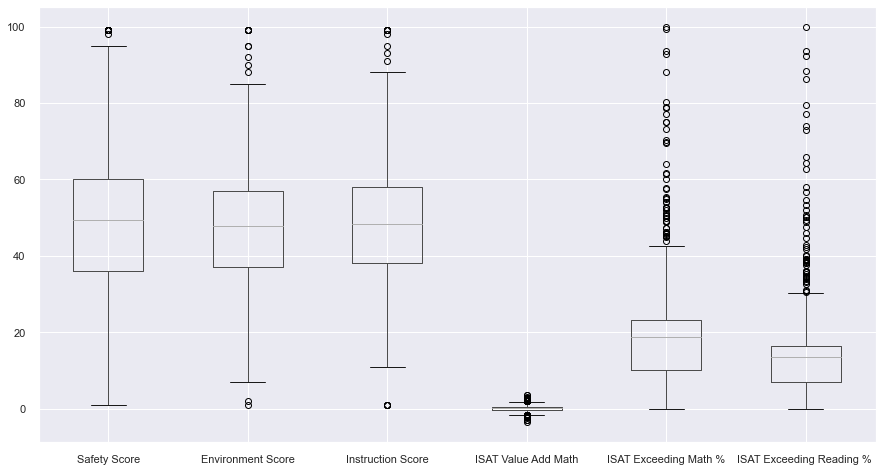

In [421]:
boxplots = cards.boxplot(column=['Safety Score', 'Environment Score', 'Instruction Score',
                                 'ISAT Value Add Math',
                               "ISAT Exceeding Math %","ISAT Exceeding Reading % "])

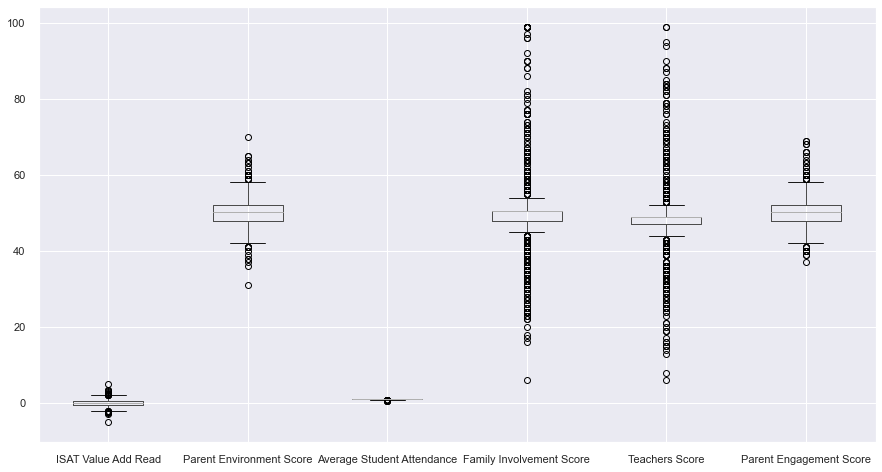

In [422]:
boxplots = cards.boxplot(column=['ISAT Value Add Read', 'Parent Environment Score', 'Average Student Attendance',
                                 'Family Involvement Score',
                               "Teachers Score","Parent Engagement Score"])

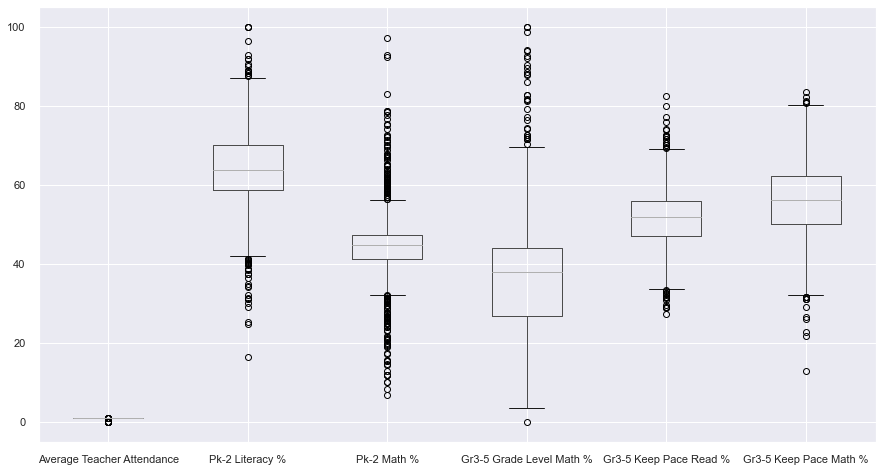

In [423]:
boxplots = cards.boxplot(column=['Average Teacher Attendance', 'Pk-2 Literacy %', 'Pk-2 Math %',
                                 'Gr3-5 Grade Level Math %',
                               "Gr3-5 Keep Pace Read %","Gr3-5 Keep Pace Math %"])

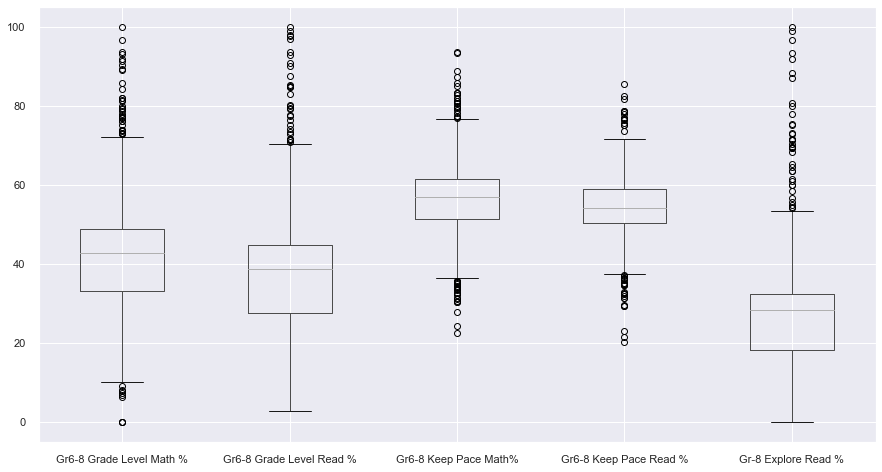

In [424]:
boxplots = cards.boxplot(column=['Gr6-8 Grade Level Math %', 'Gr6-8 Grade Level Read %', 'Gr6-8 Keep Pace Math%',
                                 'Gr6-8 Keep Pace Read %',
                               "Gr-8 Explore Read %"])

The boxplots above show the outliers in numerical data. We notice that none of the outliers reaches above 100 or 1.0, which means that all the values are correct (as 100 is the highest score one can get, and 1.0 represents 100% of something)

### Hist plots

array([[<AxesSubplot:title={'center':'Safety Score'}>,
        <AxesSubplot:title={'center':'Environment Score'}>,
        <AxesSubplot:title={'center':'Instruction Score'}>,
        <AxesSubplot:title={'center':'Rate of Misconducts (per 100 students) '}>,
        <AxesSubplot:title={'center':'ISAT Exceeding Math %'}>],
       [<AxesSubplot:title={'center':'ISAT Exceeding Reading % '}>,
        <AxesSubplot:title={'center':'ISAT Value Add Math'}>,
        <AxesSubplot:title={'center':'ISAT Value Add Read'}>,
        <AxesSubplot:title={'center':'College Enrollment (number of students) '}>,
        <AxesSubplot:title={'center':'Average Student Attendance'}>],
       [<AxesSubplot:title={'center':'Average Teacher Attendance'}>,
        <AxesSubplot:title={'center':'Individualized Education Program Compliance Rate '}>,
        <AxesSubplot:title={'center':'Family Involvement Score'}>,
        <AxesSubplot:title={'center':'Leaders Score '}>,
        <AxesSubplot:title={'center':'Teachers S

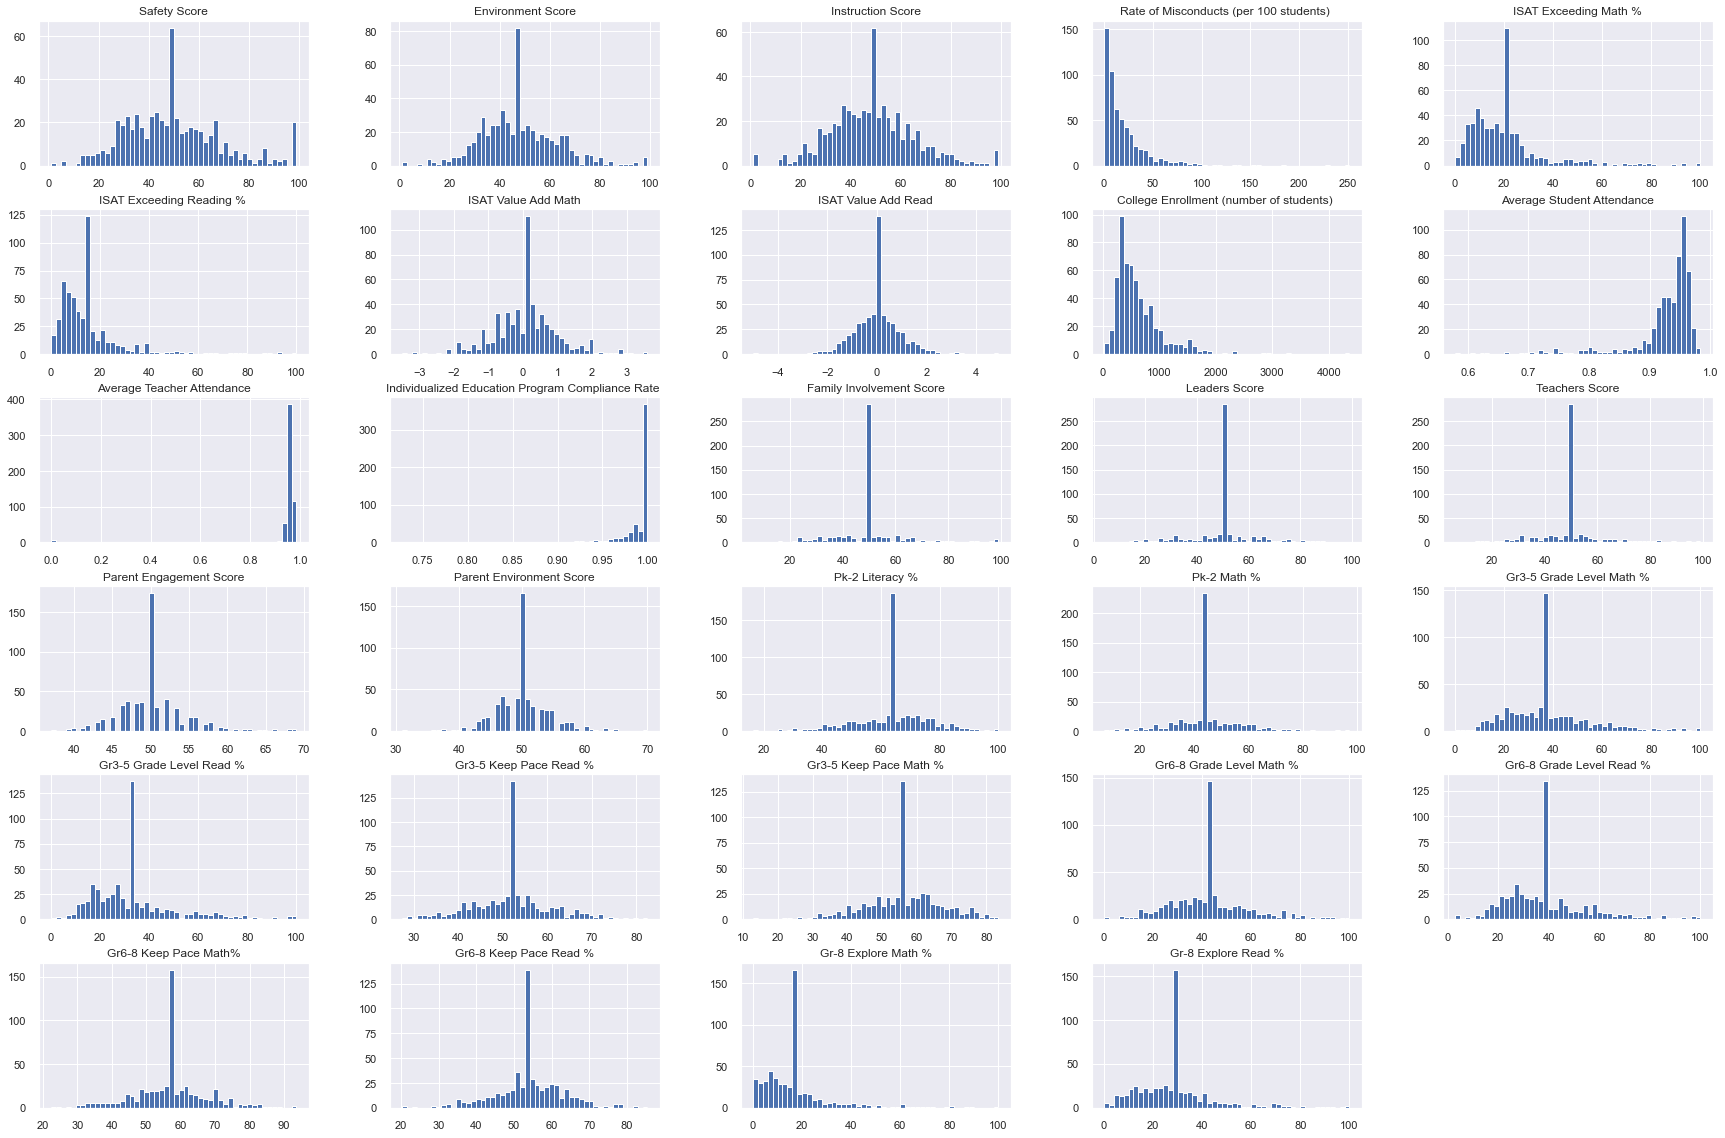

In [425]:
cards.hist(bins = 50 , figsize=(30 , 20))

The above plots give us an idea about the distribution of the data. We notice a spike in the area around middle values for many of the plots, that might be because there were a lot of missing values and I imputed them using the median of the class.

Other than that, the data seems logically distributed.

### Students

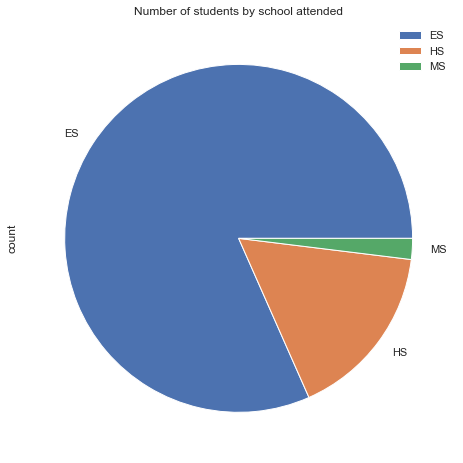

In [426]:
schools = cards.iloc[:,0]
count =  [1 for i in range(len(schools))]
data = pd.DataFrame()
data["count"] = count
data["Elementary, Middle, or High School"] = schools
data = data.groupby(["Elementary, Middle, or High School"]).sum()
pie = data.plot.pie(y="count").set(title="Number of students by school attended")

The pie chart above shows the amount of students by level of education had. It demonstrates that most students have Elementary school education, much less than that have high school education, and just a few went to school untill junior high.

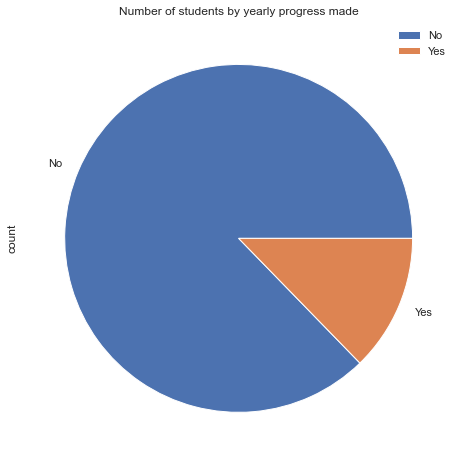

In [427]:
pro = cards.iloc[:,1]
count =  [1 for i in range(len(schools))]
data = pd.DataFrame()
data["count"] = count
data["progress_made"] = pro
data = data.groupby(["progress_made"]).sum()
pie = data.plot.pie(y="count").set(title="Number of students by yearly progress made")

And here we see the number of students by yearly progress made. More than three quarters of the students made no progress during the year in question, around 20% have improved, and a few didn't reveal their progress.

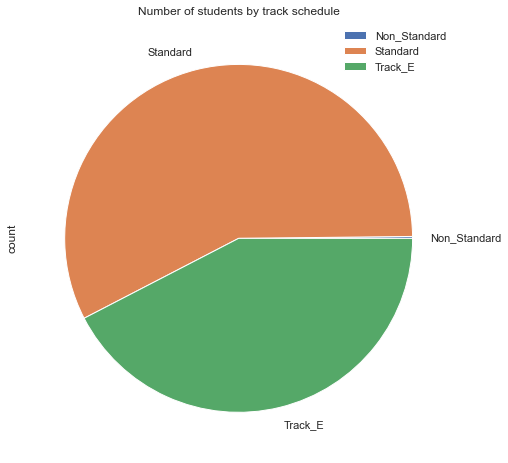

In [428]:
sch = cards.iloc[:,2]
count =  [1 for i in range(len(schools))]
data = pd.DataFrame()
data["count"] = count
data["track schedule"] = sch
data = data.groupby(["track schedule"]).sum()
pie = data.plot.pie(y="count").set(title="Number of students by track schedule")

Then we see the amount of students by track schedule which is a system that puts students with similar abilities in the same group. We notice that more than half of the students are on the stantard track, the others are on Track E, and just very few that are on a non standard track.

[Text(0.5, 1.0, 'Number of students by CPS performance policy status and level')]

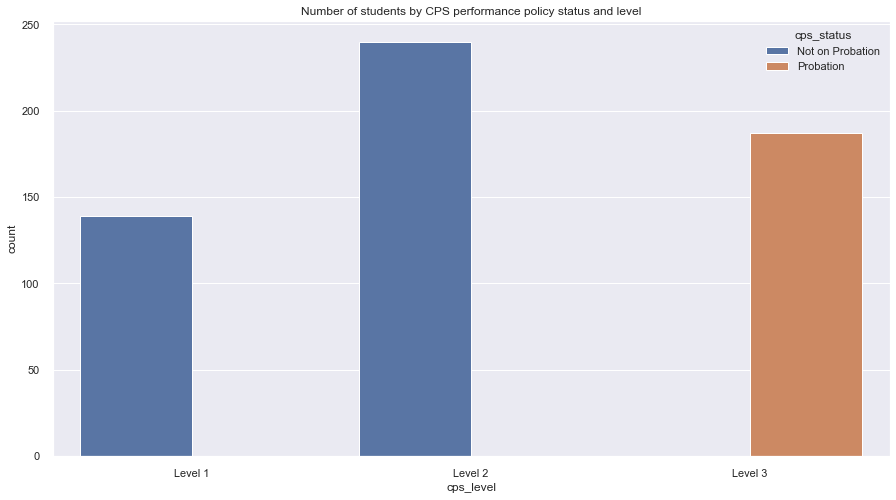

In [429]:
status = cards.iloc[:,3]
level = cards.iloc[:,4]
count = [1 for i in range(len(schools))]
data = pd.DataFrame()
data["count"] = count
data["cps_status"] = status
data["cps_level"] = level 
data = data.groupby(["cps_level"]).agg({"count":"sum","cps_status":"first"}).reset_index()
sns.barplot(x = 'cps_level', y = 'count', data = data, hue = "cps_status").set(
title = "Number of students by CPS performance policy status and level")

The bar plot above shows the number of students by CPS (Chicago Pulic Schools) performance policy status and level. We notice that most students are on levels 1 and 2 with a not on probation status, while 190 are on probation and on the third level. 

### Parents

Text(0.5, 1.0, 'Misconduct rate per 100 students by parents engagement rates')

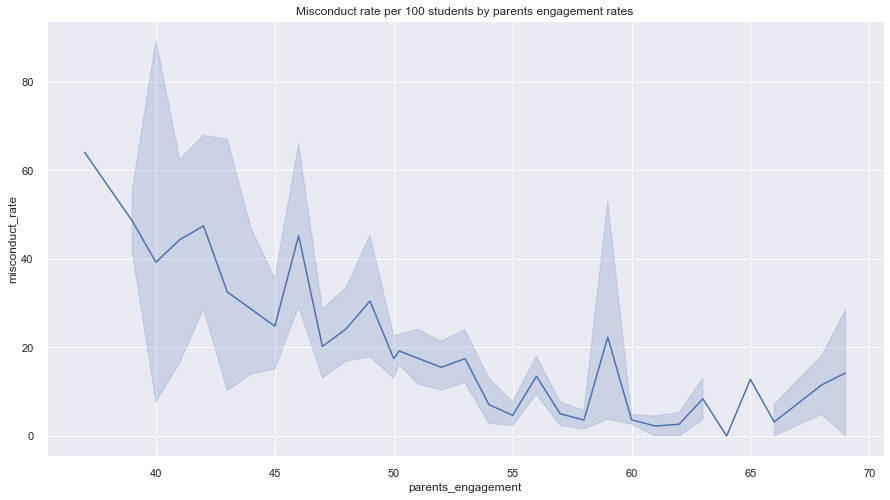

In [430]:
mis = cards.iloc[:,9]
eng = cards.iloc[:,21]
data = pd.DataFrame()
data["misconduct_rate"] = mis
data["parents_engagement"] = eng
fig,ax = plt.subplots()
ax = sns.lineplot(data = data,  x="parents_engagement", y="misconduct_rate")
ax.set_title("Misconduct rate per 100 students by parents engagement rates")

The line plot shows us the parents engamenet rate by students misconduct rate. We can say that generally less parent engagement plots higher misconduct rate. (The shadow on the plot means that there other values that have higher and/or lower misconduct rates, and the thick line represents the average of those rates).

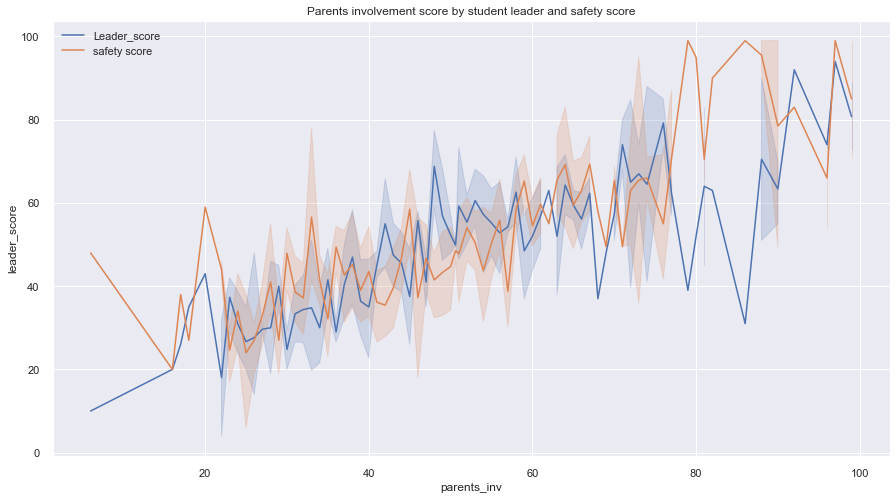

In [431]:
inv = cards.iloc[:,18]
lead = cards.iloc[:,19]
saf = cards.iloc[:,6]
data = pd.DataFrame()
data["parents_inv"] = inv
data["leader_score"] = lead
data["safety_score"] = saf
fig,ax = plt.subplots()
ax = sns.lineplot(data = data,  x="parents_inv", y="leader_score")
ax1 = sns.lineplot(data = data,  x="parents_inv",y="safety_score")
ax.set_title("Parents involvement score by student leader and safety score")
plt.legend(labels = ["Leader_score","safety score"])

The line plot demonstrates the parents involvement score by childrens' leader scores and safety scores. There is a general tendency for students safety and leader scores to go up when their parents are more involved (except for some whose parents are very involved, though they have high safety scores, they also have low leader scores).

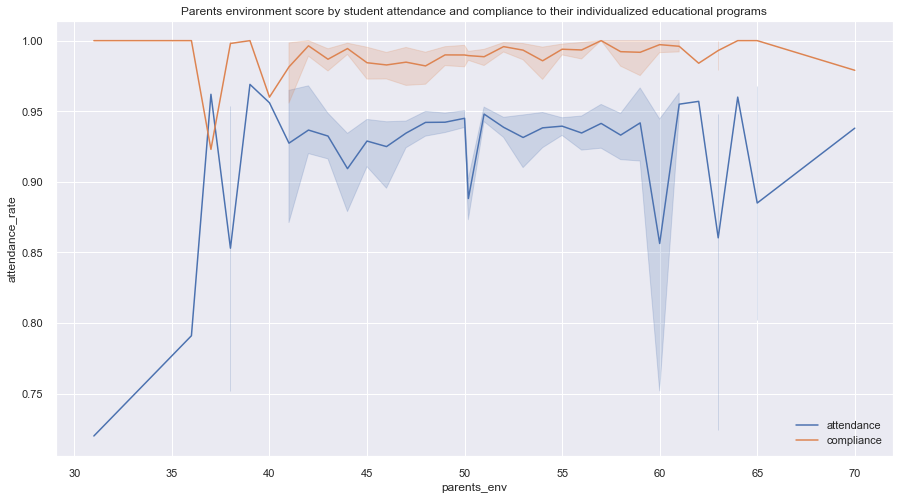

In [432]:
env = cards.iloc[:,22]
att = cards.iloc[:,15]
com = cards.iloc[:,17]
data = pd.DataFrame()
data["parents_env"] = env
data["attendance_rate"] = att
data["compliance_rate"] = com
fig,ax = plt.subplots()
ax = sns.lineplot(data = data,  x="parents_env", y="attendance_rate")
ax1 = sns.lineplot(data = data,  x="parents_env",y="compliance_rate")
ax.set_title("Parents environment score by student attendance and compliance to their individualized educational programs")
plt.legend(labels = ["attendance","compliance"])

The line plot above shows the parents environment score by student attendance and compliance to their individualized educational program. There's an overall increase in attendance rates when parents environment scores high (except for some cases). As for the compliance to the program, there is somewhat stable relationship with few fluctuations.

### Teachers

Text(0.5, 1.0, "Teachers scores by students' instruction scores")

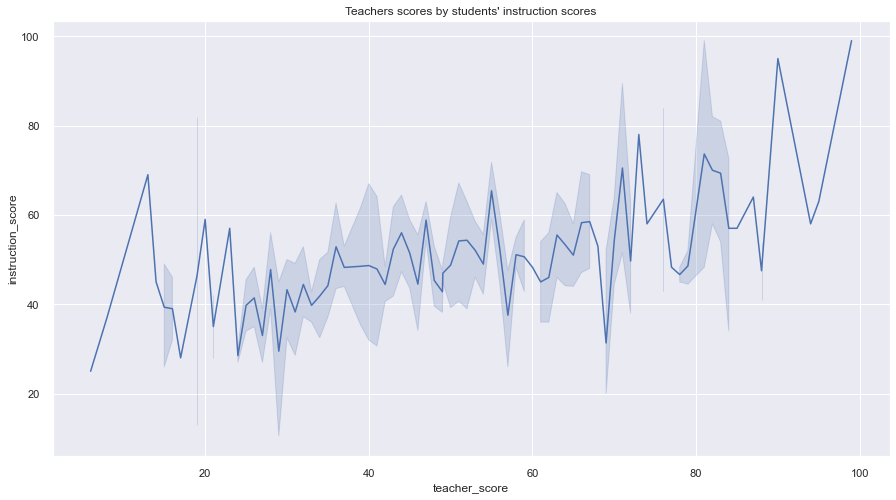

In [433]:
sco = cards.iloc[:,20]
ins = cards.iloc[:,8]
data = pd.DataFrame()
data["teacher_score"] = sco
data["instruction_score"] = ins
fig,ax = plt.subplots()
ax = sns.lineplot(data = data,  x="teacher_score", y="instruction_score")
ax.set_title("Teachers scores by students' instruction scores")

Then I checked the teachers score by students' instruction score. It generally looks like as the teacher score increases, the student instruction score increases as well.

### Correlations

<AxesSubplot:>

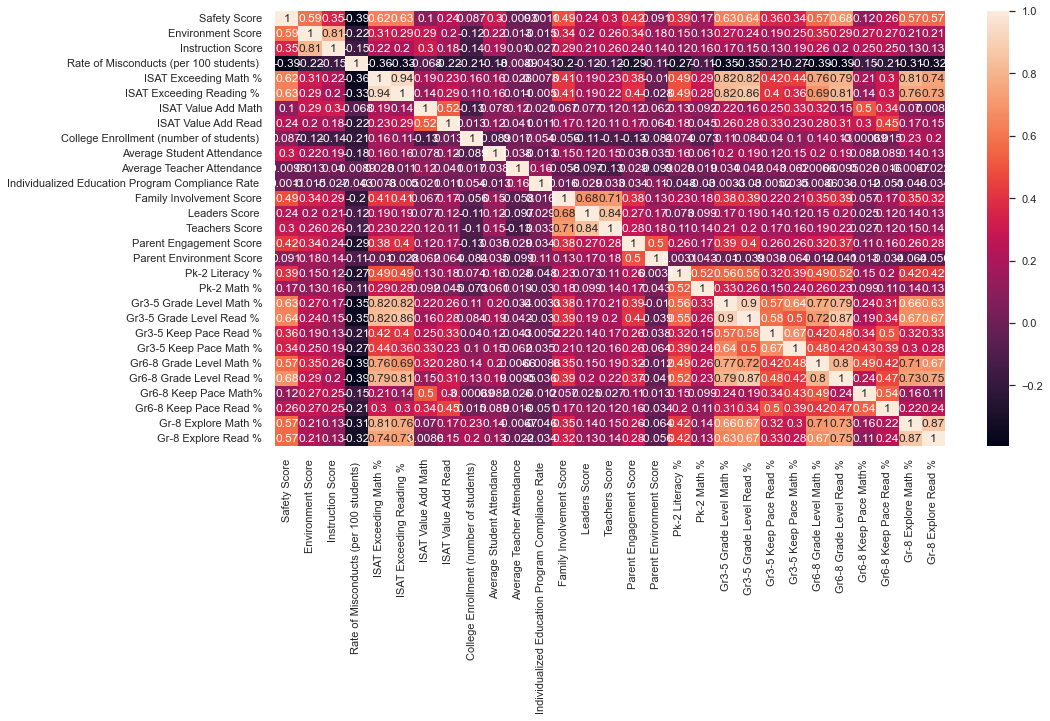

In [434]:
sns.heatmap(cards.corr(), annot = True)

The heatmap above shows the linear correlations there are between our features. In a nutshell we can deduce the following:
- The rate of misconduct has negative correlations with almost all the column especially those related to past educational assessments, meaning that students that have been scoring high throughout their study years have lower rates of misconduct.
- Previous grade score and assessments have positive correlations between each other, meaning that students who were for example good at math at early ages, are still good at it in later exams.

## Splitting train and validation sets

In [435]:
train, test = train_test_split(cards, test_size = 0.2,random_state = 42)

## Preparing data for ML

In [436]:
# Checking unique categories
cards.select_dtypes("object").apply(pd.Series.nunique, axis = 0)

Elementary, Middle, or High School    3
Adequate Yearly Progress Made?        2
Track Schedule                        3
CPS Performance Policy Status         3
CPS Performance Policy Level          3
Healthy Schools Certified?            2
dtype: int64

Abive we see the number of unique categories in each categorical column. I will apply labael encoding for the two features that have two categories (yes and no) and one hot encoder for those that have three unique categories.

In [437]:
# Separating columns on which we'll apply label encoder
label_train = train[['Adequate Yearly Progress Made? ','Healthy Schools Certified?']].copy()
label_test = test[['Adequate Yearly Progress Made? ','Healthy Schools Certified?']].copy()

In [438]:
# Separating columns on which we'll apply onehot encoder
onehot_train = train[['Elementary, Middle, or High School','Track Schedule',
                     'CPS Performance Policy Status','CPS Performance Policy Level']].copy()
onehot_test = test[['Elementary, Middle, or High School','Track Schedule',
                     'CPS Performance Policy Status','CPS Performance Policy Level']].copy()

In [439]:
# Separating columns on which we'll apply standard scaler
num_train = train.drop(['Adequate Yearly Progress Made? ','Healthy Schools Certified?',
                       'Elementary, Middle, or High School','Track Schedule',
                       'CPS Performance Policy Status','CPS Performance Policy Level'], axis = 1)
num_test = test.drop(['Adequate Yearly Progress Made? ','Healthy Schools Certified?',
                       'Elementary, Middle, or High School','Track Schedule',
                       'CPS Performance Policy Status','CPS Performance Policy Level'], axis = 1)

In [440]:
# Applying label encoding on the 2 features
lb = LabelEncoder()
label_train['Adequate Yearly Progress Made? '] = lb.fit_transform(label_train['Adequate Yearly Progress Made? '])
label_train['Healthy Schools Certified?'] = lb.fit_transform(label_train['Healthy Schools Certified?'])
label_test['Adequate Yearly Progress Made? '] = lb.fit_transform(label_test['Adequate Yearly Progress Made? '])
label_test['Healthy Schools Certified?'] = lb.fit_transform(label_test['Healthy Schools Certified?'])

In [441]:
# Joining back the datasets
train = num_train.join(label_train)
train = train.join(onehot_train)
test = num_test.join(label_test)
test = test.join(onehot_test)

In [442]:
# Applying column transformer to transform all the train set
ohe = OneHotEncoder()
sts = StandardScaler()
num = list(num_train)
onehot = list(onehot_train)
trans = ColumnTransformer([("num",sts,num),("onehot",ohe,onehot)])
train_pre = trans.fit_transform(train)

In [443]:
# Applying column transformer to transform all the test set
num = list(num_test)
onehot = list(onehot_test)
trans = ColumnTransformer([("num",sts,num),("onehot",ohe,onehot)])
test_pre = trans.fit_transform(test)

In [444]:
X = train_pre
Y = test_pre

Here I prepared the data for machine learning algorithms. First of all I label encoded the 2 columns that had only 2 categories each, then I joined it back to the dataset. Finally, I used Column Transformer to apply one hot encoding on the rest of the object columns and Standard Scaler to scale the numerical features.

## Kmeans

### Silhouette Plot

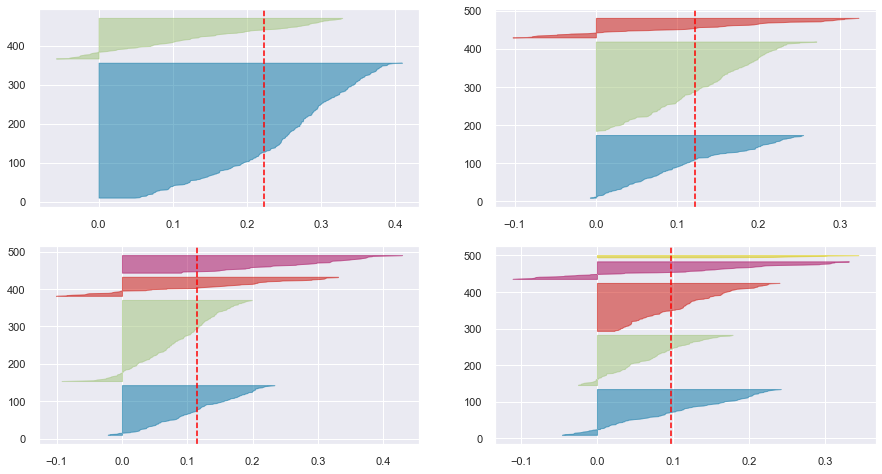

In [445]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

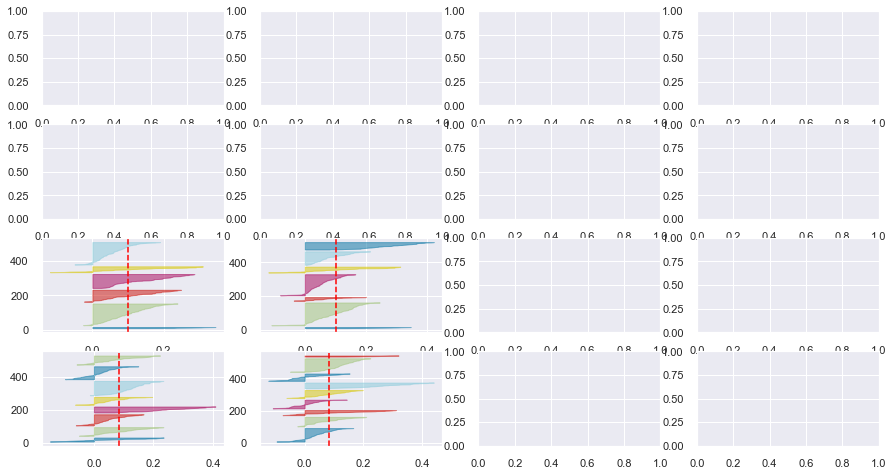

In [446]:
fig, ax = plt.subplots(4, 4, figsize=(15,8))
for i in [6, 7, 8, 9]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

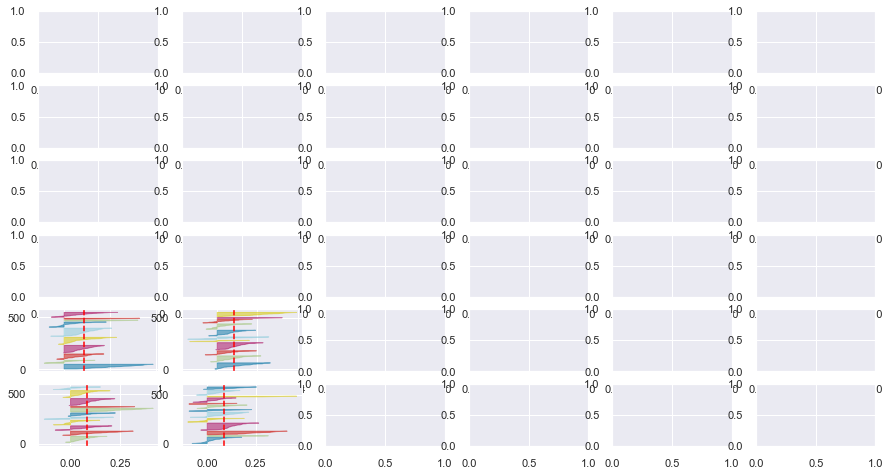

In [447]:
fig, ax = plt.subplots(6, 6, figsize=(15,8))
for i in [10, 11, 12, 13]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

### Elbow Plot

In [448]:
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

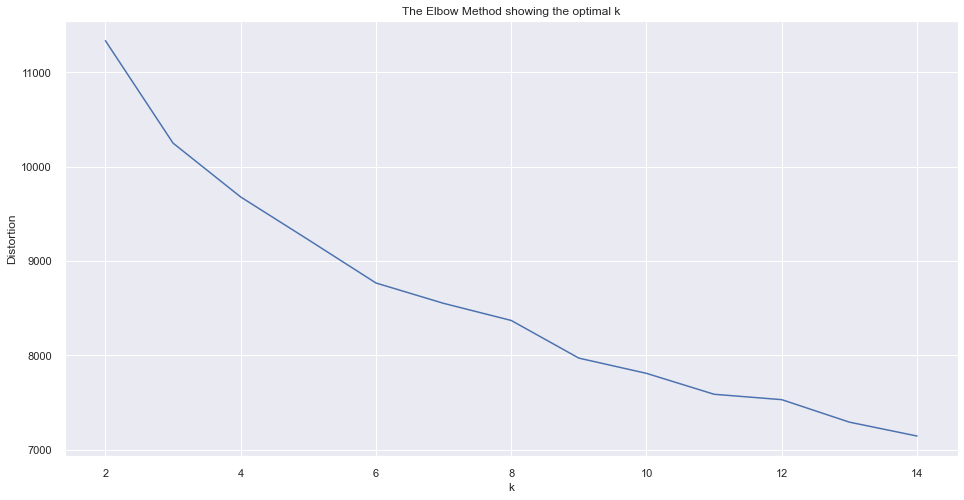

In [449]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

I used the silhouette plot and elbow plot above to see the model's performance with different numbers of clusters. From the visuals above, we see that 3 and 6 clusters represent the optimal number because:
- Their clusters are fairly similar in size.
- All of their clusters have above average silhouette scores
- Their clusters don't contains many wrongly classified instances
- The elbow plot has sharper inclines at those values
I'm hesitating between the two, so I will train the model with both and see the difference in evaluation results.

### Making predictions

In [450]:
kmeans_3 = KMeans(init='k-means++',n_clusters=3,n_init=10,max_iter=300,random_state=42)

In [451]:
# Train the model
model_3 = kmeans_3.fit(X)

In [452]:
km_pred_3= kmeans_3.fit_predict(X)  

In [453]:
labels_km_3 = model_3.labels_

In [454]:
kmeans_6 = KMeans(init='k-means++',n_clusters=6,n_init=10,max_iter=300,random_state=42)
model_6 = kmeans_6.fit(X)
km_pred_6= kmeans_6.fit_predict(X)  
labels_km_6 = model_6.labels_

In this part I imported Kmeans with 3 and 6 clusters, kept the labels and made predictions.

### Evaluation matrices

#### Silhouette score

In [455]:
s_km_3 = silhouette_score(X, km_pred_3)
print("Silhouette score is: ", s_km_3)

Silhouette score is:  0.12178856675179044


In [456]:
s_km_6 = silhouette_score(X, km_pred_6)
print("Silhouette score is: ", s_km_6)

Silhouette score is:  0.09954239213141174


The silhouette score is higher and therefore better for KM with 3 clusters

#### CH Index

In [457]:
ch_km_3 = metrics.calinski_harabasz_score(X, labels_km_3)
print("CH index: ",ch_km_3)

CH index:  82.0954690297881


In [458]:
ch_km_6 = metrics.calinski_harabasz_score(X, labels_km_6)
print("CH index: ",ch_km_6)

CH index:  53.21445899118519


The CH index is higher and better for Kmeans with 3 clusters as well

#### DB index

In [459]:
db_km_3 = davies_bouldin_score(X, labels_km_3)
print("Davies Bouldin index: ",db_km_3)

Davies Bouldin index:  2.163142321589052


In [460]:
db_km_6 = davies_bouldin_score(X, labels_km_6)
print("Davies Bouldin index: ",db_km_6)

Davies Bouldin index:  2.075311730010229


The DB index is slightly lower (better) for Kmeas with 6 clusters, but the difference is only 0.08, So from the evaluations above I choose to proceed with Kmeans with 3 clusters.

### Visualizing Kmeans clusters

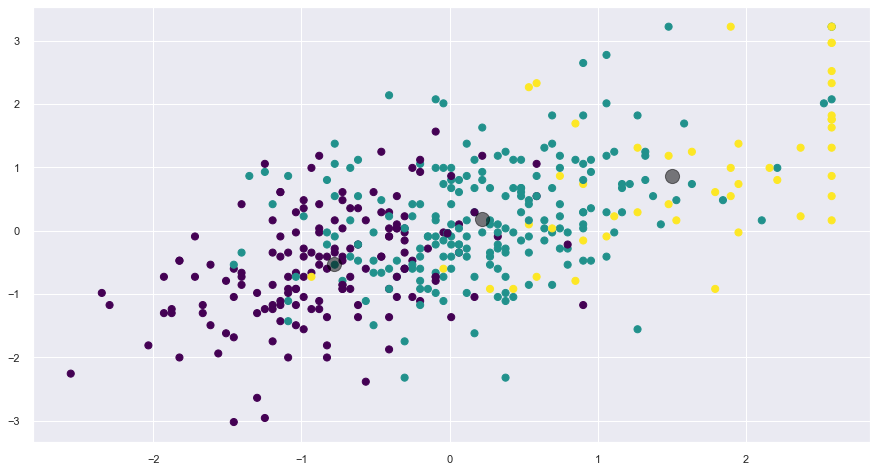

In [461]:
plt.scatter(X[:, 0], X[:, 1], c=km_pred_3, s=50, cmap='viridis')
centers = kmeans_3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

We see here the clusters generated by Kmeans and their centers, we notice that they overlap (I tried the plot with different column combinations and got the same result mostly).

### Checking the stability of the clusters

In [462]:
kmeans = KMeans(init='k-means++',n_clusters=3,n_init=10,max_iter=300,random_state=42)

In [463]:
km_pred_test= kmeans.fit_predict(Y)  

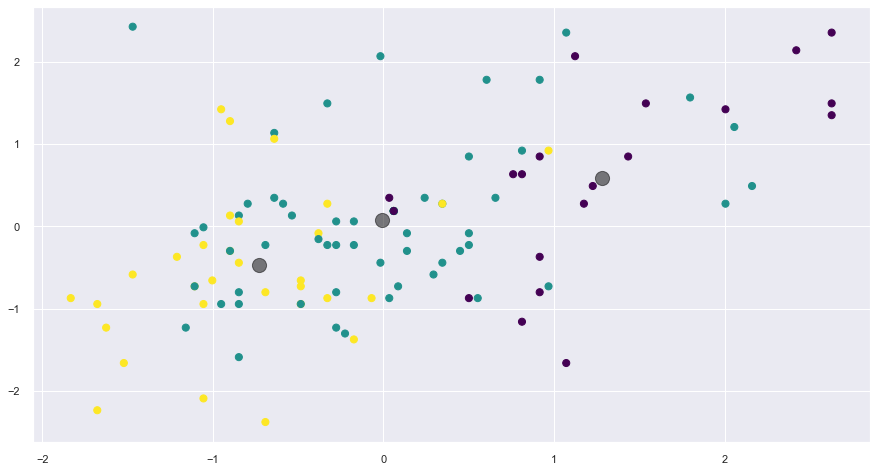

In [464]:
plt.scatter(Y[:, 0], Y[:, 1], c=km_pred_test, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

The clusters seem stable enough to me, and sharing the caracteristics as the ones obtained by the train set.

## DBSCAN

### MinPts

We generally get the number of minimum sample by multiplying the number of features by 2. 

In [465]:
print("Minimum points: ", len(cards.columns)*2)

Minimum points:  70


### Epsilon

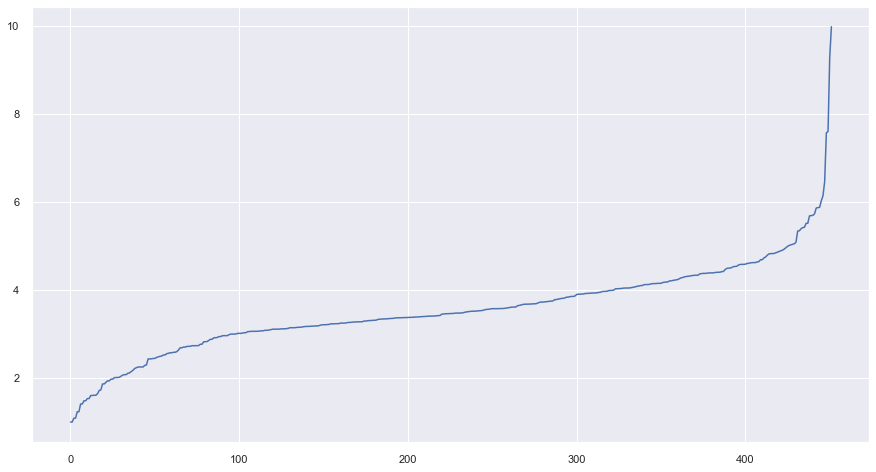

In [466]:
neighbors = NearestNeighbors(n_neighbors=70)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

in this part I used the Nearest neighbour algorithm to calculate the average distance between each instance and its neighbours.

The elbow plot above shows the average distance between each point in the dataset and its 70 nearest neighbors.The ideal value for ε will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature. This point represents the optimization point where diminishing returns are no longer worth the additional cost. In our case the optimal epsilon value seems to be about 5

### Making predictions

In [467]:
dbscan = DBSCAN(eps=5, min_samples=70)
model = dbscan.fit(X)
labels_db = model.labels_

In [468]:
dbscan_pred = dbscan.fit_predict(X)
dbscan_clstrs = np.unique(dbscan_pred)
dbscan_clstrs

array([-1,  0], dtype=int64)

### Visualizing the clusters

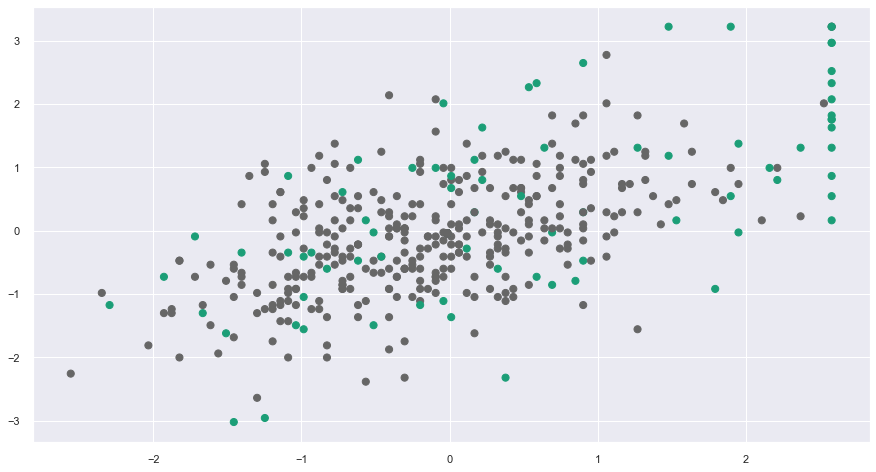

In [469]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan_pred, s=50, cmap='Dark2')

The clustering made by dbscan isn't as performant as the one made by Kmeans. For starters, dbscan only came up with one cluster (and a second one represented by -1 meaning that instances are classidied wrongly there), and its clusters are well mixed up with each other. I guess the reason that DBSCAN did this poorly is because the data doesn't show density in different parts.

### Evaluation matrices

#### Silhouette score

In [470]:
s_db = silhouette_score(X, dbscan_pred)
print("Silhouette score is: ", s_db)

Silhouette score is:  0.24802401713178684


#### CH index

In [471]:
ch_db = metrics.calinski_harabasz_score(X, labels_db)
print("CH index: ",ch_db)

CH index:  20.516922971360763


#### DB index

In [472]:
db_db = davies_bouldin_score(X, labels_db)
print("Davies Bouldin index: ", db_db)

Davies Bouldin index:  4.122776295538875


The evaluation matrices show very poor results for dbscan model. Its silhouette score and CH index are much lower than that of Kmeans, and its DB index is much higher.

### Checking the stability of the clusters

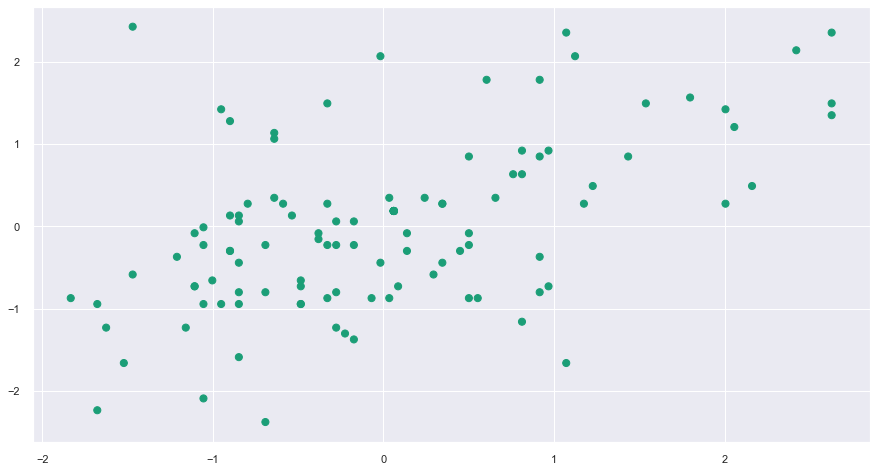

In [473]:
dbscan_pred_test = dbscan.fit_predict(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=dbscan_pred_test, s=50, cmap='Dark2')

Then I re ploted DBSCAN's results for the validation set. We see that we only have one cluster which means that the model clusters are not stable.

## Gaussian Mixture

### Making predictions

In [474]:
gmm = GaussianMixture(n_components=3)
model = gmm.fit(X)

In [475]:
gmm_pred = gmm.fit_predict(X)

In [476]:
gmm_clts = np.unique(gmm_pred) 
gmm_clts

array([0, 1, 2], dtype=int64)

### Visualizing the clusters

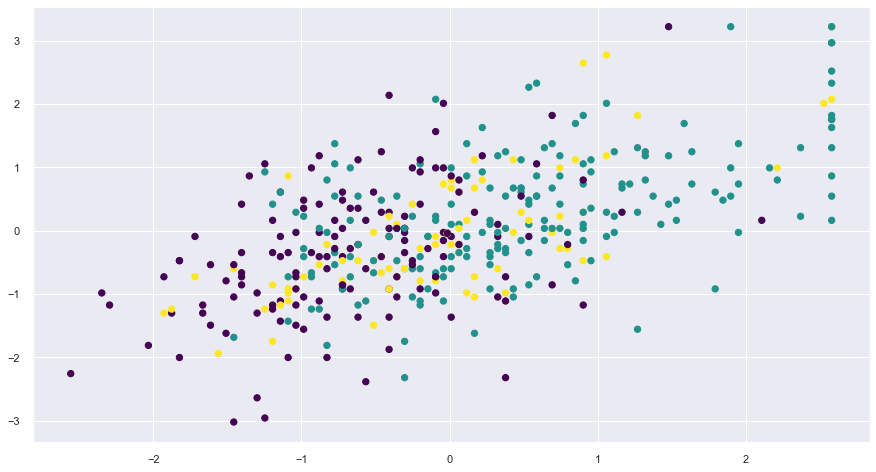

In [477]:
plt.scatter(X[:, 0], X[:, 1], c=gmm_pred, s=40, cmap='viridis')

Here I made predictions using GMM and ploted its clusters. We notice that the instances overlap a lot (just like Kmeans), though the size of clusters differ.

### Evaluation matrices

#### Silhouette score

In [478]:
s_gm = silhouette_score(X, gmm_pred)
print("Silhouette score is: ", s_gm)

Silhouette score is:  0.06858519072843547


#### CH index

In [479]:
ch_gm = metrics.calinski_harabasz_score(X, gmm_pred)
print("CH index: ",ch_gm)

CH index:  43.872799186636804


#### DB index

In [480]:
db_gm = davies_bouldin_score(X, gmm_pred)
print("Davies Bouldin index: ",db_gm)

Davies Bouldin index:  2.938585224630368


The gaussian mixture model has better results than DBSCAN, though Kmeans still performed better than it (except for the silhouette score). 

### Checking the stability of the clusters

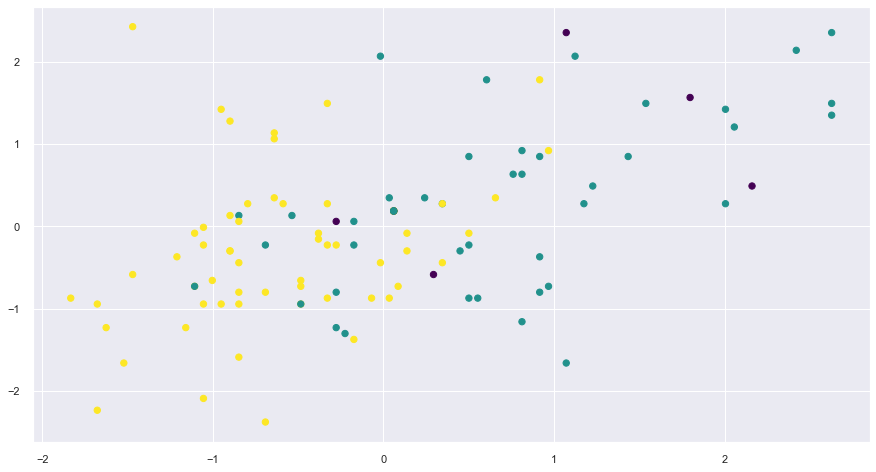

In [481]:
gmm_pred_test = gmm.fit_predict(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=gmm_pred_test, s=40, cmap='viridis')

The plot above shows the clusters of GMM with the test set, we notice that the clusters are more or less stable except for one cluster that only kept one instance (dark blue).

## Agglomerative hierarchical clustering

### Dendrogram

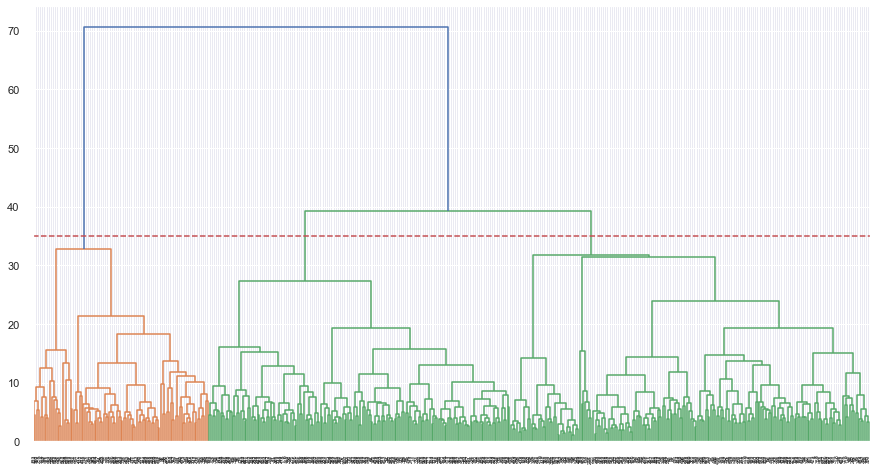

In [482]:
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=35, color='r', linestyle='--')

The dendrogram above shows all the clusters made by AHC all the way from the first instance (k clusters = k instances), untill the last instance (k clusters = 1). It also demonstrates the links it made throughout the clustering. I will go ahead with 3 clusters and therefore cut the axline at around 35.

### Making predictions 

In [483]:
agg = AgglomerativeClustering(n_clusters=3)

In [484]:
agg_pred = agg.fit_predict(X)

In [485]:
agg_clts = np.unique(agg_pred)
agg_clts

array([0, 1, 2], dtype=int64)

### Visualizing clusters

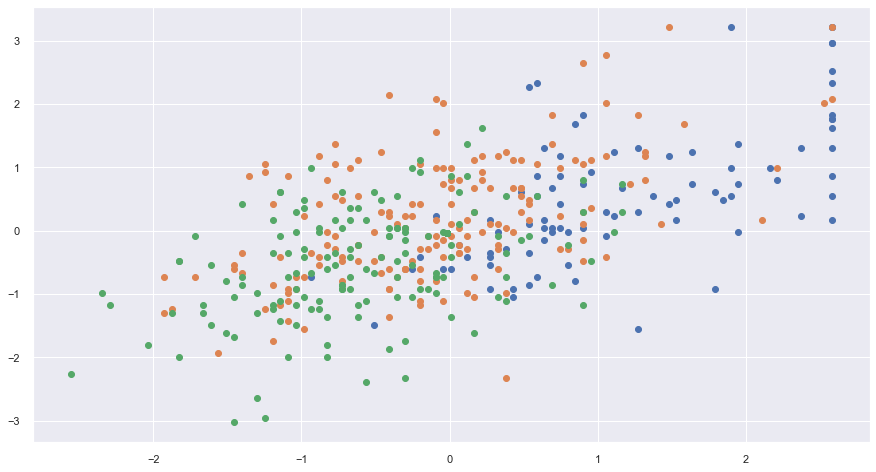

In [486]:
for agg_clt in agg_clts:
    index = np.where(agg_pred == agg_clt)
    plt.scatter(X[index, 0], X[index,1])

The plot above shows us the clusters made by AHC, they look very similar to those of Kmeans.

### Evaluation matrices

#### Silhouette score

In [487]:
s_agg = silhouette_score(X, agg_pred)
print("Silhouette score is: ", s_agg)

Silhouette score is:  0.0811216802665927


#### CH index

In [488]:
ch_agg = metrics.calinski_harabasz_score(X, agg_pred)
print("CH index: ",ch_agg)

CH index:  68.27645758708763


#### DB index

In [489]:
db_agg = davies_bouldin_score(X, agg_pred)
print("Davies Bouldin index: ",db_agg)

Davies Bouldin index:  2.6909819405746447


The results obtained by AHC are better compared to DBSCAN and GMM, though they are slightly lower than Kmeans.

### Checking the stability of the clusters

In [490]:
agg_pred_test = agg.fit_predict(Y)
agg_clts_test = np.unique(agg_pred_test)

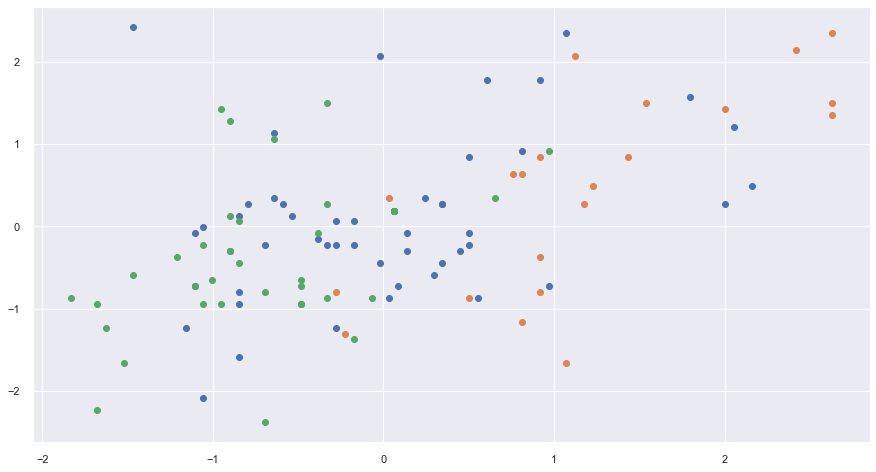

In [491]:
for agg_clt in agg_clts_test:
    index = np.where(agg_pred_test == agg_clt)
    plt.scatter(Y[index, 0], Y[index,1])

The clusters made made AHC seem pretty stable to me.

## Comparing algorithms performances

In [492]:
scores = [["KM", s_km_3 ,ch_km_3,db_km_3 ],["DBSCAN", s_db, ch_db, db_db],
         ["GMM", s_gm, ch_gm, db_gm],["AHC", s_agg, ch_agg, db_agg]]
scores_df = pd.DataFrame(scores, columns = ["Model", "Silhouette score", "CH index", "DB index"])
scores_df

,Model,Silhouette score,CH index,DB index
0,KM,0.121789,82.095469,2.163142
1,DBSCAN,0.248024,20.516923,4.122776
2,GMM,0.068585,43.872799,2.938585
3,AHC,0.081122,68.276458,2.690982


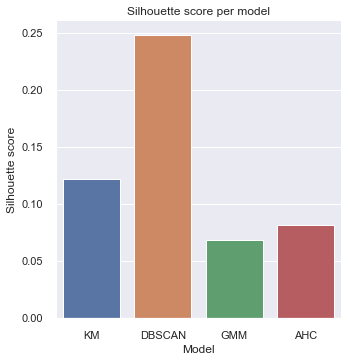

In [493]:
sns.catplot(data=scores_df, kind="bar",x ="Model", y="Silhouette score").set(title="Silhouette score per model")

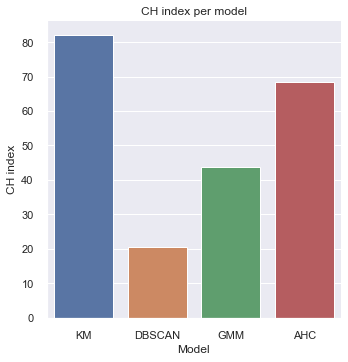

In [494]:
sns.catplot(data=scores_df, kind="bar",x ="Model", y="CH index").set(title="CH index per model")

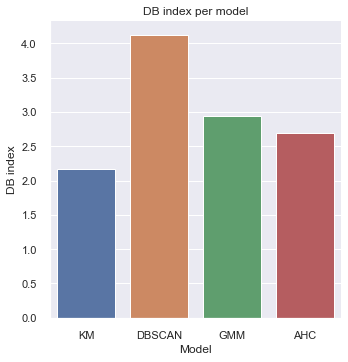

In [495]:
sns.catplot(data=scores_df, kind="bar",x ="Model", y="DB index").set(title="DB index per model")

## Conclusion

From the comparisons above we understance the following:
- The silhouette score is the highest for DBSCAN model meaning that the clusters it generated are dense enough and well separated, the others models scored less than it.
- The CH index  which evaluates the validity of clusters by using the average between- and within- cluster sum of squares is higher (and better) for Kmeans.
- The DB index which is the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances, is lower for Kmeans as well, meaning that Kmeans clusters are the one with less similarity in its clusters.

From the above and the fact that its clusters are stable enough (as shown in the plots before), I choose Kmeans as the most adequate model for this dataset.

## References

https://neptune.ai/blog/clustering-algorithms

https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

https://github.com/imane-ayouni/Customer-Segmentation/blob/main/Customer%20Segmentation%20Part%20III.ipynb